Sprint 8 : Exercicis d'algoritmes d'Agrupació.

Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [95]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Cargem les dades
df = pd.read_csv('A:\Sole\Sprint 8\Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [96]:
# Mirem com està fet el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Aquest conjunt de dades consta de 7050 files i 16 columnes, que inclouen dades d'interacció de publicacions a Facebook. 
Totes les columnes de text, categoriques (status_id, status_type, status_published) i les numèriques (num_likes, num_loves, [...], num_angrys) estan completes sense valors nuls.
Hi ha quatre columnes (Column1 a Column4) que estan totalment buides, amb només valors nuls Dtype float64. 
Netejem el dataframe i guardar solament les columnes que ens donin informacio amb utilitat. 

Pre-processament del Dataframe

In [97]:
# Eliminem les Columnes amb null values i ens assegurem que ja no hi siguin 
df = df.dropna(axis=1, how='all')
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [98]:
# Eliminem la columna 'status_id'
df = df.drop(['status_id'], axis=1)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Conversio de les dades per exploracio 

L’algoritme K-Means és una eina versàtil per a l’agrupació de dades que s’aplica en una àmplia gamma de camps i problemes. La seva capacitat de trobar patrons subjacents en dades inigualables fa que sigui útil en situacions en què busqui organitzar, analitzar o comprendre conjunts de dades sense una guia pre-existent.

In [99]:
# Com els K-means estan dissenyats per funcionar òptimament amb data numèrica, necessitem convertir les columnes categòriques 'status type' i 'status_published' en numèriques. Per això utilitzarem el procés de 'one-hot enconding', amb el mètode de 'get_dummies' amb Pandas. Primer convertim 'status_type':
df_encoded = pd.get_dummies(df, columns=['status_type'])
df_encoded.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,False,False,False,True
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,False,True,False,False
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,False,False,False,True
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,False,True,False,False
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,False,True,False,False


In [100]:
df_encoded.columns

Index(['status_published', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'status_type_link', 'status_type_photo',
       'status_type_status', 'status_type_video'],
      dtype='object')

Visualització de dades per interpretació
Anem a comprobar la corelacion de les dades per interntar identfiicar valors atipics 

In [101]:
# Ara convertirem la columna 'status_published' en una numèrica, per això, convertirem la data en segons
df_encoded['status_published'] = pd.to_datetime(df_encoded['status_published'])
df_encoded['status_published'] = (df_encoded['status_published'] - df_encoded['status_published'].min()) / pd.Timedelta(seconds=1)
df_encoded.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,182056140.0,529,512,262,432,92,3,1,1,0,False,False,False,True
1,182030040.0,150,0,0,150,0,0,0,0,0,False,True,False,False
2,181970760.0,227,236,57,204,21,1,1,0,0,False,False,False,True
3,181957080.0,111,0,0,111,0,0,0,0,0,False,True,False,False
4,181701060.0,213,0,0,204,9,0,0,0,0,False,True,False,False


In [102]:
# Convertim els valors bool en uint8, per que siguin numeriques 
df_encoded['status_type_link'] = df_encoded['status_type_link'].astype('uint8')
df_encoded['status_type_photo'] = df_encoded['status_type_photo'].astype('uint8')
df_encoded['status_type_status'] = df_encoded['status_type_status'].astype('uint8')
df_encoded['status_type_video'] = df_encoded['status_type_video'].astype('uint8')

In [103]:
# Verifiquem que s'hagi fet correctament
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_published    7050 non-null   float64
 1   num_reactions       7050 non-null   int64  
 2   num_comments        7050 non-null   int64  
 3   num_shares          7050 non-null   int64  
 4   num_likes           7050 non-null   int64  
 5   num_loves           7050 non-null   int64  
 6   num_wows            7050 non-null   int64  
 7   num_hahas           7050 non-null   int64  
 8   num_sads            7050 non-null   int64  
 9   num_angrys          7050 non-null   int64  
 10  status_type_link    7050 non-null   uint8  
 11  status_type_photo   7050 non-null   uint8  
 12  status_type_status  7050 non-null   uint8  
 13  status_type_video   7050 non-null   uint8  
dtypes: float64(1), int64(9), uint8(4)
memory usage: 578.4 KB


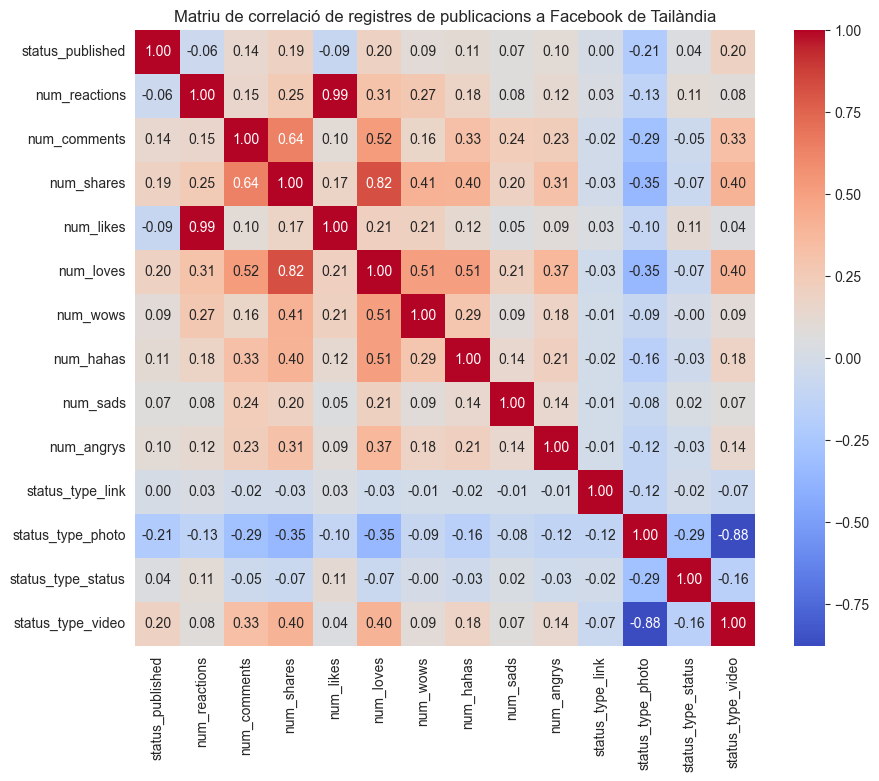

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculem la matriu de correlació del nostre Dataframe ajustat anomenat df_encoded
correlation_matrix = df_encoded.corr()

# Creem i mostrem el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriu de correlació de registres de publicacions a Facebook de Tailàndia")
plt.show()

La matriu de correlació de registres de publicacions a Facebook de Tailàndia ens deixa veure que:
- Hi ha una correlació gairebé total (0.99) entre el nombre de Likes (num_likes) i el nombre de Reaccions (num_reactions). Això és comprensible, ja que els "likes" són la forma de reacció més utilitzada a Facebook.
- Hi ha una alta correlació (0.82) entre el nombre de Cors (num_loves) i el nombre de vegades que es comparteix una publicació (num_shares). Això pot suggerir que els usuaris són molt més susceptibles de compartir publicacions que els hi creen plaer vs. altres emocions. Així mateix, el nombre de comentaris en publicacions amb un cor estan a 0.52, els usuaris renforcent les seves preferències amb comentaris. També podríem agregar el nombre de riures (num_hahas) i la relació amb quantes vegades aquest tipus de publicacion estan compartides (num_shares) ja que tenen una correlació positiva de (0.40) com altre element que crea plaer als usuaris i que per això decideixen compartir-ho amb altres.
- Hi ha una correlació relativament alta (0,64) entre els comentaris (num_comments) i els compartits (num_shares), cosa que suggereix que les publicacions que conviden a la discussió també solen ser compartides amb freqüència.
- Les reaccions de tristesa (num_sads) i enfadades (num_angrys) generalment tenen correlacions baixes amb interaccions com num_shares, num_reactions i num_comments, cosa que podria significar que són menys comunes o que les publicacions que les generen són específiques i no creen un sentiment que fa que els usuaris generin altres interaccions.
- Trobo que cal destacar la correlació negativa màxima entre el vídeo i les imatges compartides com a estatus, a un -0,88. Durant els darrers anys, a causa de la influència d'altres mitjans de comunicació social com Instagram, una empresa de Meta (Old Facebook), el tipus de contingut més sovint compartit són vídeos. Ja fa temps que són els estats o els àlbums de fotos creats pels usuaris. Això és particularment evident quan comprovem el compromís (reaccions, comentaris, accions, likes, amors) creat entre una imatge en estat (que va des de -0,10 a -0,35, totes negatives) i un vídeo (0,08 a 0,40, completament positiu).
- Outliers: les correlacions baixes en general fora de "likes" i "reaccions" podrien suggerir que hi ha outliers o que les interaccions són força específiques per a cada publicació, sense realment crear un patró evident.

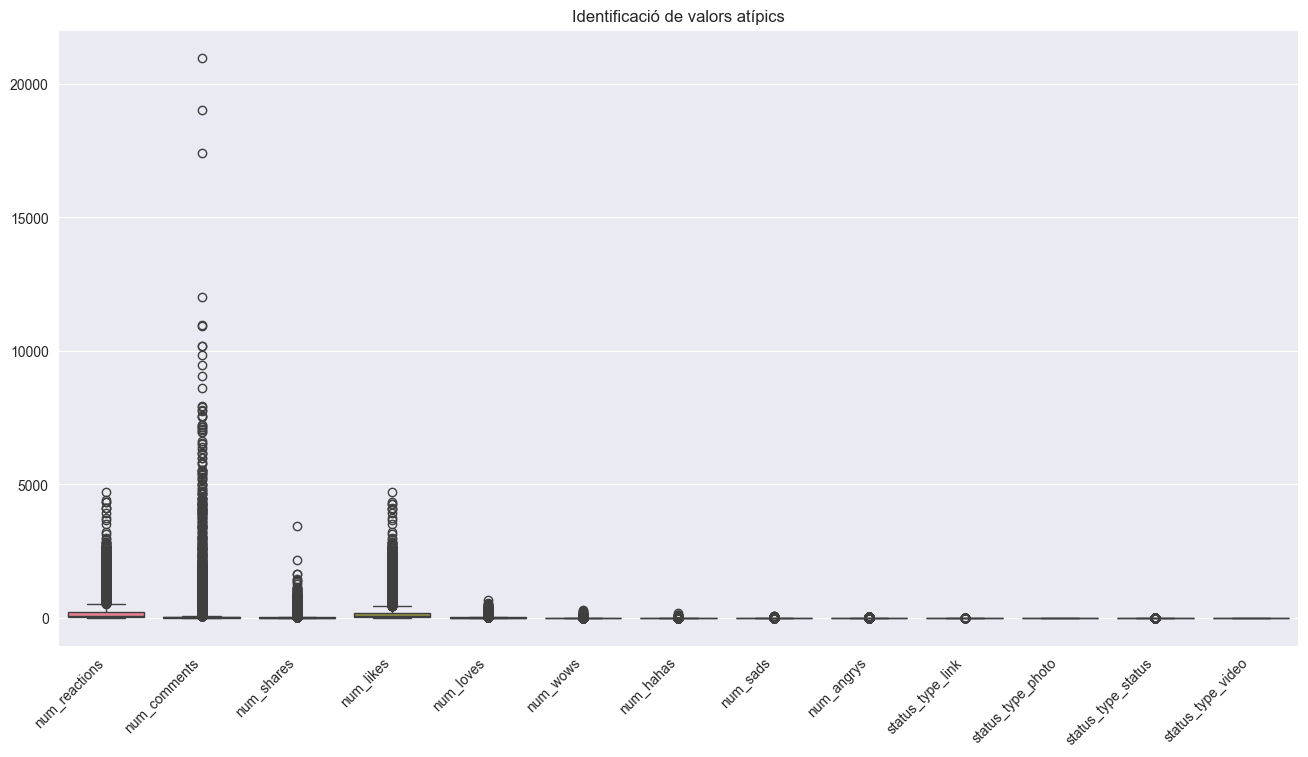

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionem les columnes que volem visualitzar
columnes = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link', 'status_type_photo','status_type_status', 'status_type_video']

# Creem un Boxplot per a cada columna seleccionada
plt.figure(figsize=(16, 8))  # Increase the figure size
boxplot = sns.boxplot(data=df_encoded[columnes])

# Com hi ha moltes columnes, girem les etiquetes de les columnes per poder visualitzar-les millor
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right', fontsize=10)  

plt.title('Identificació de valors atípics')
plt.show()

Després de comprovar el Boxplot anterior, puc veure que hi ha alguns punts de dades que difereixen significativament de la resta de les observacions per a la columna "num_comment" i en un grau menor a la "num_shares". Saben com funciona Facebook i altres xarxes socials, veure que algunes publicacions poden tenir més de 10 000, fins i tot passant de 18 000 a més de 20 000 comentaris no sembla tan estrany, ja que això podria passar a les publicacions que s'han fet "viral". Quan alguna cosa ves fa "viral", vol dir que es propaga ràpidament i àmpliament per Internet o altres canals de mitjans, obtenint un nivell d'atenció i compromís important i sovint exponencial. El contingut viral tendeix a generar un alt nivell de compromís, com ara likes, comentaris, accions i visualitzacions. Tot i que no respectin la distribució més comuna, no crec que aquests punts de dades s’hagin de considerar com a contaminants de les nostres distribucions, ja que tenen dades correctes i no són un error de càrrega.

In [106]:
# Per estar segurs que la nostra mostra prové d’una població normalment distribuïda, anem a fer el test de Shapiro-Wilk :
from scipy.stats import shapiro

# Selecionem les columnes 
columns_to_test = ['status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']

# Bucle a través de columnes i realitzem la prova de shapiro-wilk
for column in columns_to_test:
    data = df_encoded[column]
    stat, p_value = shapiro(data)

    # Comprovem el p-value
    if p_value > 0.05:
        print(f"Les dades de la columna {column} semblen distribuir-se normalment.")
    else:
        print(f"Les dades de la columna {column} no semblen distribuir-se normalment.")

Les dades de la columna status_published no semblen distribuir-se normalment.
Les dades de la columna num_reactions no semblen distribuir-se normalment.
Les dades de la columna num_comments no semblen distribuir-se normalment.
Les dades de la columna num_shares no semblen distribuir-se normalment.
Les dades de la columna num_likes no semblen distribuir-se normalment.
Les dades de la columna num_loves no semblen distribuir-se normalment.
Les dades de la columna num_wows no semblen distribuir-se normalment.
Les dades de la columna num_hahas no semblen distribuir-se normalment.
Les dades de la columna num_sads no semblen distribuir-se normalment.
Les dades de la columna num_angrys no semblen distribuir-se normalment.
Les dades de la columna status_type_link no semblen distribuir-se normalment.
Les dades de la columna status_type_photo no semblen distribuir-se normalment.
Les dades de la columna status_type_status no semblen distribuir-se normalment.
Les dades de la columna status_type_vid

Com tots els atributs s'han identificat com a no-gaussians i tenint en compte la presència de valors atípics i la distribució esbiaixada de les variables, utilitzarem RobustScaler per les nostres dades. Aquest mètode serveix per escalar les funcions numèriques d’un conjunt de dades, especialment dissenyat per gestionar la presència de conjunts de dades del món real que poden contenir outliers o presentar distribucions no normals. Ajuda a assegurar un procés d’escalat més robust i fiable en presència d’aquestes característiques de dades.

In [107]:
from sklearn.preprocessing import RobustScaler

# Creem una copia del DataFrame original per no modificar les dades originals
df_scaled = df_encoded.copy()

# Identifiquem totes les columnes numèriques
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Inicialitzem el RobustScaler
scaler = RobustScaler()

# Apliquem l'escalat a totes les columnes numèriques
df_scaled[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Mostrem les primeres files del nou DataFrame escalat per verificar els canvis
print(df_scaled.head())

   status_published  num_reactions  num_comments  num_shares  num_likes  \
0          0.214499       2.324257     22.086957       65.50   2.229508   
1          0.214082       0.448020     -0.173913        0.00   0.548435   
2          0.213133       0.829208     10.086957       14.25   0.870343   
3          0.212914       0.254950     -0.173913        0.00   0.315946   
4          0.208819       0.759901     -0.173913        0.00   0.870343   

   num_loves  num_wows  num_hahas  num_sads  num_angrys  status_type_link  \
0  30.666667       3.0        1.0       1.0         0.0                 0   
1   0.000000       0.0        0.0       0.0         0.0                 0   
2   7.000000       1.0        1.0       0.0         0.0                 0   
3   0.000000       0.0        0.0       0.0         0.0                 0   
4   3.000000       0.0        0.0       0.0         0.0                 0   

   status_type_photo  status_type_status  status_type_video  
0                  0    

Aquest pas de preprocessament es realitza habitualment per assegurar-se que les funcions numèriques es troben a una escala similar, cosa que les fa adequades per a models d’aprenentatge automàtic.

In [108]:
# comprobem com està feta:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_published    7050 non-null   float64
 1   num_reactions       7050 non-null   float64
 2   num_comments        7050 non-null   float64
 3   num_shares          7050 non-null   float64
 4   num_likes           7050 non-null   float64
 5   num_loves           7050 non-null   float64
 6   num_wows            7050 non-null   float64
 7   num_hahas           7050 non-null   float64
 8   num_sads            7050 non-null   float64
 9   num_angrys          7050 non-null   float64
 10  status_type_link    7050 non-null   uint8  
 11  status_type_photo   7050 non-null   uint8  
 12  status_type_status  7050 non-null   uint8  
 13  status_type_video   7050 non-null   uint8  
dtypes: float64(10), uint8(4)
memory usage: 578.4 KB


Anàlisi de Components Principals (PCA)
L'Anàlisi de Components Principals (PCA) és una tècnica que redueix la dimensionalitat d'un conjunt de dades mentre conserva la seva informació essencial. Transforma les variables originals en noves components ortogonals que capturen la variabilitat màxima. Aquesta tècnica és útil per simplificar l'anàlisi, eliminar la multicolinealitat, i pot ser aplicada en àrees com l'anàlisi d'imatges, la compressió de dades i la reconeixement de patrons. La selecció del nombre òptim de components es basa en la variabilitat explicada, oferint una eina efectiva per gestionar conjunts de dades grans o d'alta dimensionalitat. 


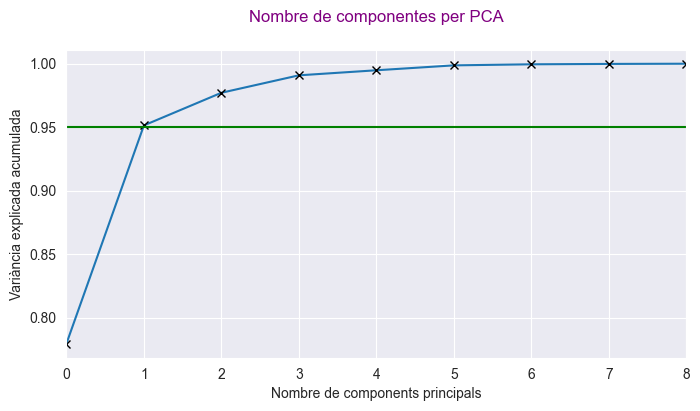

In [109]:
# Intentem determinar el nombre de components principals necessaris per capturar una certa variació en les dades
from sklearn.decomposition import PCA
import numpy as np

df_pca = PCA().fit(df_scaled.select_dtypes(include=['float']))
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(df_pca.explained_variance_ratio_), marker = "x", markersize=6, markeredgecolor='black')
plt.axhline(0.95, color = "g", linestyle = "-")
plt.xlim([0, 8])
plt.xlabel("Nombre de components principals")
plt.ylabel("Variància explicada acumulada");
plt.title("Nombre de componentes per PCA", fontsize=12, pad=20, color='purple')
plt.show()

La línia horitzontal al 95% és un llindar comú que indica el nivell desitjat de variància explicada. La trama mostra la rapidesa que la variància explicada acumulada augmenta amb el nombre de components, ajudant a decidir un nombre adequat de components per a la reducció de la dimensionalitat. En aquest cas, el punt optim es el segon component (1). 

In [118]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Identifiquem les columnes numèriques
numeric_columns = np.arange(df_scaled.shape[1])

# Converteix l'array a un DataFrame
df_scaled_pd = pd.DataFrame(df_scaled, columns=df_encoded.columns)

# Separem les dades numèriques
df_numeric = df_scaled_pd.iloc[:, numeric_columns]

# Normalitza les dades
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

# Apliquem PCA amb 2 components
pca = PCA(n_components=2)
df_pca_result = pca.fit_transform(df_numeric_scaled)

# Creem un nou array amb els components principals com a columnes
df_pca = np.column_stack((df_pca_result[:, 0], df_pca_result[:, 1]))

# Concateno els components principals amb les altres columnes de l'array original
df_final = np.column_stack((df_pca, df_scaled[:, ~np.isin(np.arange(df_scaled.shape[1]), numeric_columns)]))

# Convertim l'array resultant a un DataFrame de Pandas 
column_names = ['PC1', 'PC2'] + [f'Column_{i}' for i in range(df_scaled.shape[1] - len(numeric_columns))]
df_final = pd.DataFrame(df_final, columns=column_names)

# Mostrem les primeres files del nou DataFrame
print(df_final.head())

        PC1       PC2
0  2.958308 -0.495048
1 -0.917816  0.048211
2  1.000065 -0.959776
3 -0.955712 -0.055269
4 -0.762833  0.195620


K-means algorisme
En aquest mètode no supervisat de clusterització hi ha un paràmetre clau, que és el nombre de clusters (k). El que farem és escalar les característiques (aka Feature Scaling) i després aplicarem el mètode del colze (elbow).

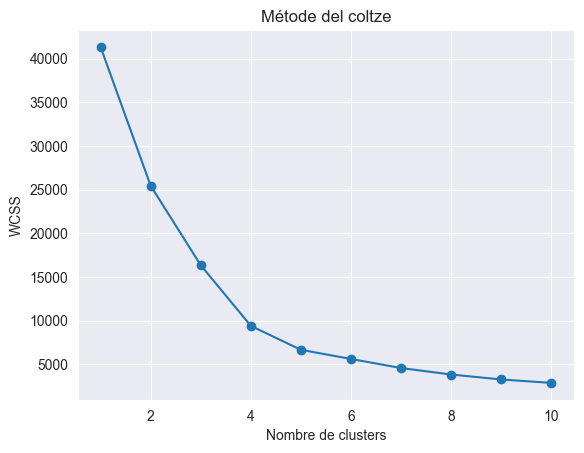

In [111]:
# K-Means és sensible a l'escala de les variables, hem d'escalar les caracteristiques (aka Feature Scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Escalat de Característiques: aquest escalador estandarditza les característiques eliminant la mitjana i escalant-les a la variància unitària
scaler = StandardScaler()
# Creem una copia del DataFrame: 
df_scaled = df_encoded.copy()
# Escalat de les Característiques: aquesta operació substitueix els valors originals a df_scaled pels valors escalats
df_scaled = scaler.fit_transform(df_encoded)
# Atès que no sabem quants clústers hi ha, fem servir el mètode del colze, per triar el nombre de clústers optim
X = df_scaled

wcss = [] 
for i in range(1, 11):  # Probarem de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)

# Dibuixem el gràfic de la WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Métode del coltze')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

WCSS (Within-Cluster-Sum-of-Squares) és una mesura utilitzada en algorismes de clustering, com ara K-Means, per avaluar la cohesió dels clústers obtinguts. La WCSS és la suma de les distàncies quadrades entre cada punt d'un clúster i el seu centroid, sumades per a tots els clústers.
En el context de l'algoritme K-Means, la WCSS s'utilitza per trobar el nombre òptim de clústers. En concret, es busca aquell punt on la WCSS comença a canviar lentament, indicant que afegir més clústers no millorarà significativament la cohesió dels clústers. Aquest punt correspon al "colze" en el gràfic de la WCSS en funció del nombre de clústers.
La gràfica produïda pel mètode del colze no mostra un punt de fallida clar, per la qual cosa pot ser difícil determinar el nombre òptim de clústers. En aquests cas, sembla que a partir del cluster 4. 

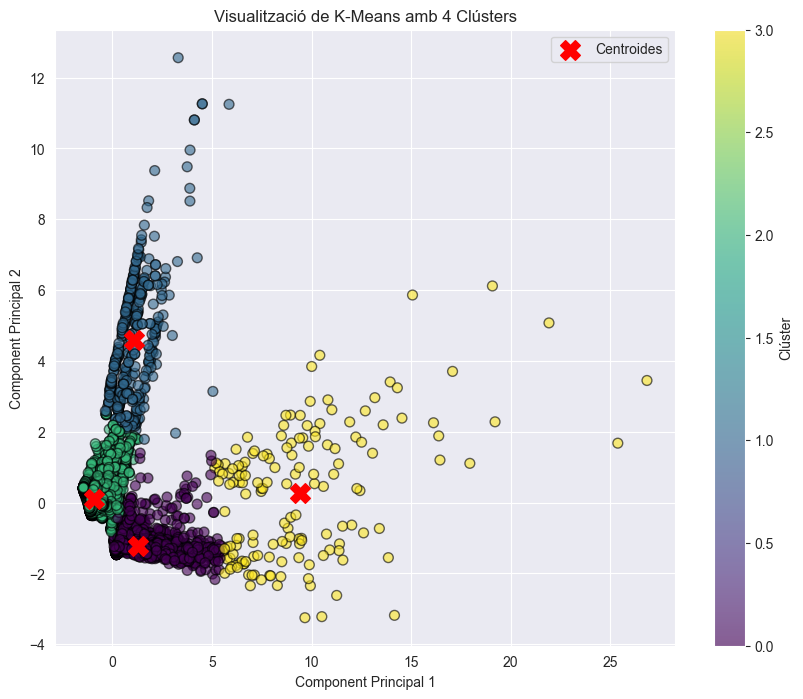

In [112]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Entrenam el K-means amb 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_final)

# Creem la visualització usant les dues primeres components principals
plt.figure(figsize=(10, 8))
plt.scatter(df_final['PC1'], df_final['PC2'], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Visualització de K-Means amb 4 Clústers')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.colorbar(label='Clúster')

# Agreguem centroides dels clústers perque ens indiqui la mitjana aritmètica de tots els punts dins del clúster 
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.legend()
plt.show()

Aquest gràfic mostra les publicacions a Facebook sobre Tailàndia agrupades en 4 clústers mitjançant K-means després d'aplicar-hi PCA. 
En el gràfic de dispersió, es poden veure els punts distribuïts en diferents regions, amb colors que indiquen la pertinença al clúster i una creueta vermella indica la mitjana aritmètica de tots els punts dins del clúster. Encara que al;guns punts es superposint, rls clústers presenten distribucions distintes, indicant que PCA i K-means han diferenciat eficaçment els grups. 
 Podem veure que hi ha outliers, i aquest podrien ser representatius de publicacions que han creat moltes interaccions, per exemple. 

Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

L'algorisme de clustering jeràrquic és un mètode de clustering que construeix una jerarquia d'agrupacions. Aquesta jerarquia es representa com un arbre (dendrograma), on les fulles de l'arbre són els punts individuals del conjunt de dades i els nodes interns representen agrupacions de punts. L'algorisme comença amb cada punt com un clúster individual i, gradualment, fusiona els clústers més similars a mesura que es mou cap amunt a l'arbre.
Un dels avantatges del clustering jeràrquic és que no requereix especificar el nombre de clústers abans del temps, ja que proporciona una visió jeràrquica de totes les possibles agrupacions. El dendrograma permet visualitzar com els clústers es fusionen o es divideixen al llarg del procés.


In [113]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Creem el model
hclustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

# Ajustem el model
hclustering.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

En un algoritme de clustering jeràrquic, el mètode Ward s'utilitza per avaluar la distància entre dos clústers abans de decidir si han de fusionar-se. La idea principal és minimitzar l'augment en la variància total que resultaria de la fusió de dos clústers en un de sol. Selecciona la fusió que minimitza aquest augment en la variància, el que es considera beneficiós per preservar l'homogeneïtat dins dels clústers. És el que utilitzarem ara:

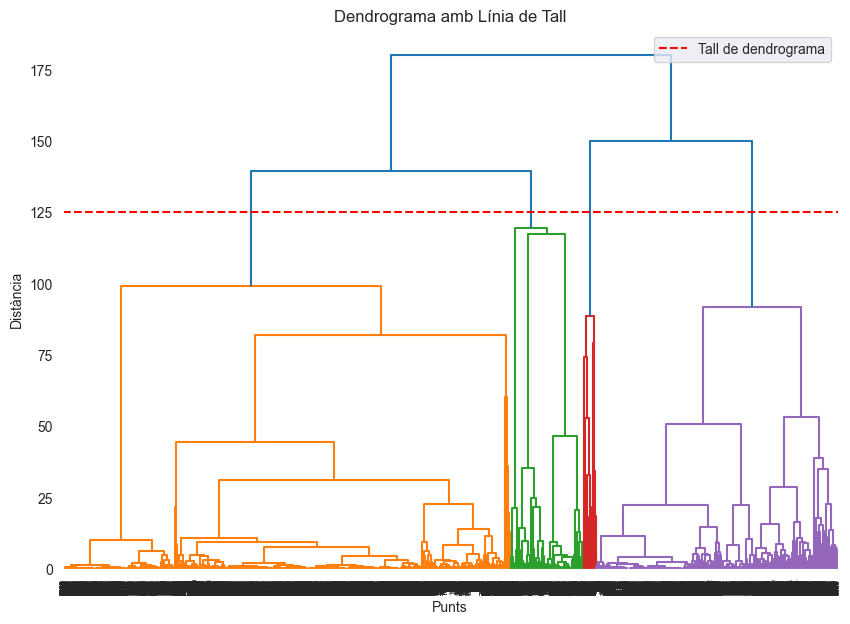

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Creem el dendrograma
linked = linkage(X, method='ward')

# Mostrem el dendrograma amb una línia horitzontal de tall
plt.figure(figsize=(10, 7))
dendrogram(linked)

# Afegim la línia de tall amb un color diferent (pots ajustar el valor segons les teves necessitats)
plt.axhline(y=125, color='r', linestyle='--', label='Tall de dendrograma')

# Etiquetes i títols
plt.title('Dendrograma amb Línia de Tall')
plt.xlabel('Punts')
plt.ylabel('Distància')
plt.legend()

# Mostrem la visualització
plt.show()

Observem al dendrograma que l'algorisme de clustering jeràrquic amb línia de tall ha clusteritzat les nostres dades en 4 grups. El clúster taronja inclou el nombre més gran de punts, dons de mostres, a mesura que anem cap amunt, les línies es van fusionant en branques successives, mostrant com les mostres es van agrupant fen aquest clúster més gran. El clúster verd no es forma de tantes mostres, però sí que tenen dissimilituds perquè la distància vertical entre les branques que es fusionen indica la distància o dissimilitud entre els dos clústers que es combinen, i en aquest cas és els finals es combinen més a dalt que la meitat del gràfic. El clúster vermell és el que comprèn el nombre més gros de punts similars i denota de més intensitat. Finalment, el clúster violeta engloba també molts punts i denota d'una divisió més clara dintre del seu clúster.
Podem veure que els clústers no són molt similars perquè quan mirem la distància que han trigat a conversar, és un 1/3 del gràfic.

Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.
Calcularem el silhouette_score per les nostres dades. Aquesta és una mètrica utilitzada per avaluar la qualitat de les agrupacions en problemes de clustering. Mesura com de ben separats estan els clústers i és calculat per a cada punt de dades dins d'un clúster. La puntuació de silueta varia entre -1 i 1, i els valors més alts indiquen una millor qualitat de clustering.

In [115]:
# Calculem el rendiment dels dos models
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_final)
Kmeans_silhouette = silhouette_score(df_final, kmeans_labels)

# Clustering Jeràrquic Aglomeratiu
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(df_final)
Hclustering_silhouette = silhouette_score(df_final, agg_labels)

# Resultats
print("Puntuació de silueta amb K-means:", Kmeans_silhouette.round(5))
print("Puntuació de silueta amb Clustering Jeràrquic Aglomeratiu:", Hclustering_silhouette.round(5))

Puntuació de silueta amb K-means: 0.63002
Puntuació de silueta amb Clustering Jeràrquic Aglomeratiu: 0.64374


Una puntuació de silueta mitjana de 0.63002 i 0.64374 és relativament alta i suggeriria que els clústers estan ben separats i que l'algoritme de clustering ha acomplert una bona tasca en la formació dels clústers. El Clustering jerarquic aglomeratiu sembla tenir una lleugera superioritat.

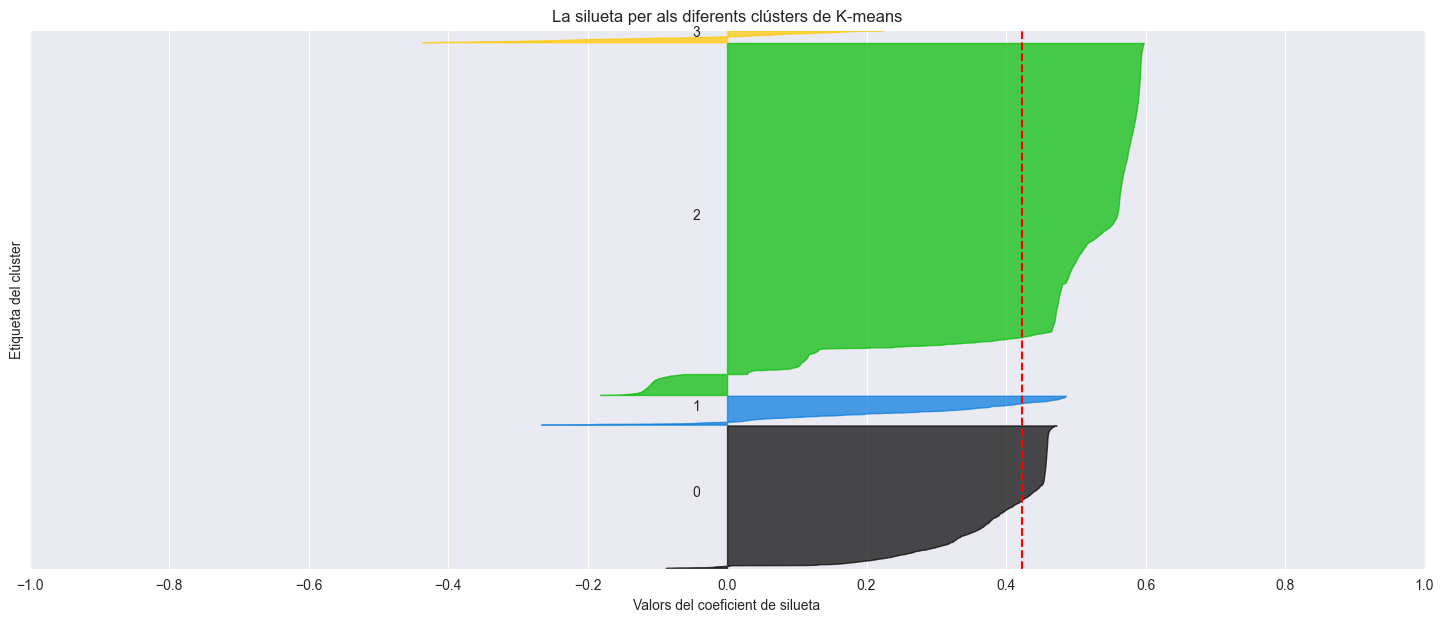

In [116]:
# Grafiquem la puntuacio de silueta amb K-Means
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Calcula els coeficients de silueta
sample_silhouette_values = silhouette_samples(X, kmeans_labels)

# Nombre de clústers
n_clusters = len(set(kmeans_labels))

# Configuració del gràfic de silueta
plt.figure(figsize=(18, 7))
plt.xlim([-1, 1])
plt.ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Línia vertical del coeficient de silueta mitjà
silhouette_avg = silhouette_score(X, kmeans_labels)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# Configuració de títols i etiquetes
plt.title("La silueta per als diferents clústers de K-means")
plt.xlabel("Valors del coeficient de silueta")
plt.ylabel("Etiqueta del clúster")

# Elimina les etiquetes y_ticks
plt.yticks([])

# Estableix els valors de l'eix x
plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Mostra el gràfic
plt.show()

Conclusions:
- Els clústers 0, 1 i 2 presenten punts de dades ben definits i agrupats de manera estreta. Això és evident perquè la majoria dels seus punts de dades tenen coeficients de silueta en el rang positiu, especialment entre 0 i poc més de 0,6.
- L'alta concentració de punts de dades amb coeficients de silueta positius suggereix que aquests grups (0, 1 i 2) estan fortament cohesionats i estan ben separats internament.
- El clúster 3 sembla estar menys cohesionat, tal com indica una proporció significativa dels seus punts de dades que tenen coeficients de silueta en el rang negatiu, concretament lleugerament per sobre de -0,4. Aquest cluster podria representar una reagregació de punts de dades que es van agrupar de manera contundent. La quantitat més gran de punts de dades a l'extrem negatiu (poc més de -0,4) implica que aquests punts poden no coincidir bé dins del clúster.
Aquestes troballes suggereixen que els clústers 0, 1 i 2 són agrupacions més fiables i naturals a les dades, mentre que el clúster 3 pot necessitar més investigació. La comprensió de les característiques i els motius potencials de la naturalesa menys cohesionada del Clúster 3 podria guiar l'anàlisi o el perfeccionament addicionals de l'enfocament d'agrupació.

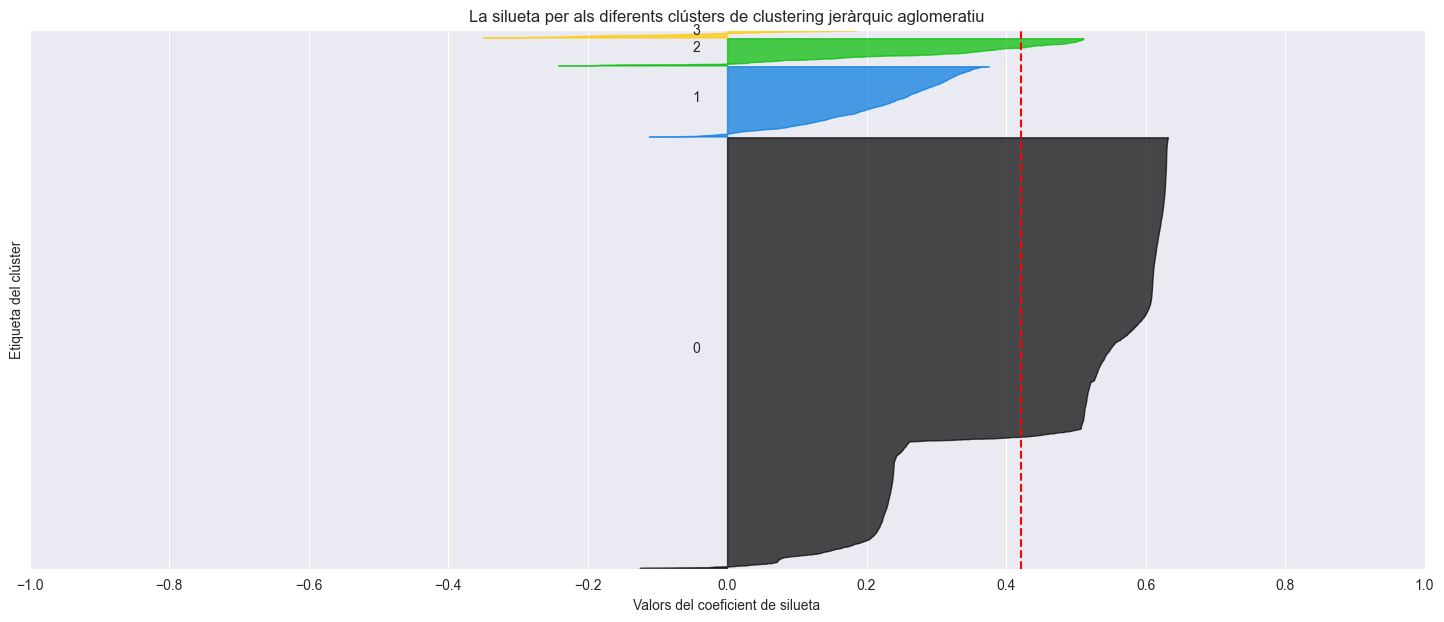

In [117]:
# Grafiquem el Clustering Jeràrquic Aglomeratiu
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Calcula els coeficients de silueta
sample_silhouette_values = silhouette_samples(X, agg_labels)

# Nombre de clústers
n_clusters = len(set(agg_labels))

# Configuració del gràfic de silueta
plt.figure(figsize=(18, 7))
plt.xlim([-1, 1])
plt.ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[agg_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot with color
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label each cluster on the plot
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# Línia vertical del coeficient de silueta mitjà
silhouette_avg = silhouette_score(X, agg_labels)
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

# Configuració de títols i etiquetes
plt.title("La silueta per als diferents clústers de clustering jeràrquic aglomeratiu")
plt.xlabel("Valors del coeficient de silueta")
plt.ylabel("Etiqueta del clúster")

# Elimina les etiquetes y_ticks
plt.yticks([])

# Estableix els valors de l'eix x
plt.xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

# Mostra el gràfic
plt.show()

Conclusions:
- El domini del Clúster 0 en termes de punts de dades i coeficients de silueta positius indica que representa un grup cohesionat i ben definit.
- Clústers 1 i 2 també mostren forts coeficients de silueta positius, donant suport a l'eficàcia del mètode d'agrupació per separar aquests grups.
- Clúster 3, amb els seus coeficients de silueta inferior i negatiu, pot representar un conjunt de punts de dades més heterogeni o menys ben definit.
La naturalesa del mètode d'agrupació jeràrquica aglomerativa influeix en la mida i l'estructura dels clústers. A diferència de K-Means, que divideix les dades en clústers de la mateixa mida, l'agrupació jeràrquica tendeix a crear clústers basats en una estructura jeràrquica.